##### Copyright 2018 The TF-Agents Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Train a Deep Q Network with TF-Agents

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/agents/tutorials/1_dqn_tutorial">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/agents/blob/master/docs/tutorials/1_dqn_tutorial.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/agents/blob/master/docs/tutorials/1_dqn_tutorial.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/agents/docs/tutorials/1_dqn_tutorial.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Introduction


This example shows how to train a [DQN (Deep Q Networks)](https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf)  agent on the Cartpole environment using the TF-Agents library.

![Cartpole environment](https://raw.githubusercontent.com/tensorflow/agents/master/docs/tutorials/images/cartpole.png)

It will walk you through all the components in a Reinforcement Learning (RL) pipeline for training, evaluation and data collection.


To run this code live, click the 'Run in Google Colab' link above.


## Setup

If you haven't installed the following dependencies, run:

In [2]:
!sudo apt-get install -y xvfb ffmpeg
!pip install -q gym
!pip install -q 'imageio==2.4.0'
!pip install -q PILLOW
!pip install -q pyglet
!pip install -q pyvirtualdisplay
!pip install -q tf-agents

The following packages were automatically installed and are no longer required:
  dconf-gsettings-backend dconf-service dkms freeglut3 freeglut3-dev
  glib-networking glib-networking-common glib-networking-services
  gsettings-desktop-schemas libcairo-gobject2 libcolord2 libdconf1
  libegl1-mesa libepoxy0 libglu1-mesa libglu1-mesa-dev libgtk-3-0
  libgtk-3-common libice-dev libjansson4 libjson-glib-1.0-0
  libjson-glib-1.0-common libproxy1v5 librest-0.7-0 libsm-dev
  libsoup-gnome2.4-1 libsoup2.4-1 libxi-dev libxmu-dev libxmu-headers
  libxnvctrl0 libxt-dev linux-gcp-headers-5.0.0-1026
  linux-headers-5.0.0-1026-gcp linux-image-5.0.0-1026-gcp
  linux-modules-5.0.0-1026-gcp pkg-config policykit-1-gnome python3-xkit
  screen-resolution-extra xserver-xorg-core-hwe-18.04
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  i965-va-driver libaacs0 libass9 libavc1394-0 libavcodec57 libavdevice57
  libavfilter6 libavformat57 libavresample3 libavutil

The following NEW packages will be installed:
  ffmpeg i965-va-driver libaacs0 libass9 libavc1394-0 libavcodec57
  libavdevice57 libavfilter6 libavformat57 libavresample3 libavutil55
  libbdplus0 libbluray2 libbs2b0 libcaca0 libcdio-cdda2 libcdio-paranoia2
  libcdio17 libchromaprint1 libcrystalhd3 libdc1394-22 libfftw3-double3
  libflite1 libgme0 libgsm1 libiec61883-0 libjack-jackd2-0 libllvm10
  libmp3lame0 libmpg123-0 libmysofa0 libnorm1 libnuma1 libopenal-data
  libopenal1 libopenjp2-7 libopenmpt0 libopus0 libpgm-5.2-0 libpostproc54
  libraw1394-11 librubberband2 libsamplerate0 libsdl2-2.0-0 libshine3
  libsnappy1v5 libsndio6.1 libsodium23 libsoxr0 libspeex1 libssh-gcrypt-4
  libswresample2 libswscale4 libtheora0 libtwolame0 libva-drm2 libva-x11-2
  libva2 libvorbisfile3 libvpx5 libwavpack1 libwebpmux3 libx264-152
  libx265-146 libxss1 libxvidcore4 libzmq5 libzvbi-common libzvbi0
  mesa-va-drivers va-driver-all xvfb
The following packages will be upgraded:
  libdrm-amdgpu1 libdrm-co

Get:1 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libxss1 amd64 1:1.2.2-1 [8582 B]
Get:2 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/main amd64 libdrm-common all 2.4.101-2~18.04.1 [5560 B]
1% [Waiting for headers]

Get:3 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/main amd64 libdrm-dev amd64 2.4.101-2~18.04.1 [126 kB]
Get:4 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/main amd64 libdrm-intel1 amd64 2.4.101-2~18.04.1 [60.0 kB]
Get:5 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/main amd64 libdrm-radeon1 amd64 2.4.101-2~18.04.1 [21.7 kB]
Get:6 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/main amd64 libdrm-nouveau2 amd64 2.4.101-2~18.04.1 [16.5 kB]
Get:7 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/main amd64 libdrm-amdgpu1 amd64 2.4.101-2~18.04.1 [18.2 kB]
Get:8 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/main amd64 libdrm2 amd64 2.4.101-2~18.04.1 [32.3 kB]
Get:9 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/main amd64 libnuma1 amd64 2.0.11-2.1ubuntu0.1 [22.0 kB]
3% [Waiting for headers]

Get:10 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libva2 amd64 2.1.0-3 [47.6 kB]
3% [Waiting for headers]

Get:11 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libva-drm2 amd64 2.1.0-3 [6880 B]
3% [Waiting for headers]

Get:12 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libva-x11-2 amd64 2.1.0-3 [11.5 kB]
4% [Working]

Get:13 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libavutil55 amd64 7:3.4.8-0ubuntu0.2 [190 kB]
4% [Waiting for headers]

Get:14 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libcrystalhd3 amd64 1:0.0~git20110715.fdd2f19-12 [45.8 kB]
5% [Waiting for headers]

Get:15 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libgsm1 amd64 1.0.13-4build1 [22.4 kB]
5% [Waiting for headers]

Get:16 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libmp3lame0 amd64 3.100-2 [136 kB]
5% [Waiting for headers]

Get:17 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libopenjp2-7 amd64 2.3.0-2build0.18.04.1 [145 kB]
Get:18 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libopus0 amd64 1.1.2-1ubuntu1 [159 kB]
6% [Waiting for headers]

Get:19 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libshine3 amd64 3.1.1-1 [22.9 kB]
7% [Waiting for headers]

Get:20 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libsnappy1v5 amd64 1.1.7-1 [16.0 kB]
7% [Waiting for headers]

Get:21 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libspeex1 amd64 1.2~rc1.2-1ubuntu2 [52.1 kB]
7% [Waiting for headers]

Get:22 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libsoxr0 amd64 0.1.2-3 [65.9 kB]
Get:23 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libswresample2 amd64 7:3.4.8-0ubuntu0.2 [55.2 kB]
8% [Waiting for headers]

Get:24 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libtheora0 amd64 1.1.1+dfsg.1-14 [170 kB]
8% [Waiting for headers]

Get:25 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libtwolame0 amd64 0.3.13-3 [46.7 kB]
Get:26 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/main amd64 libvpx5 amd64 1.7.0-3ubuntu0.18.04.1 [796 kB]
10% [Waiting for headers]

Get:27 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/main amd64 libwavpack1 amd64 5.1.0-2ubuntu1.4 [76.6 kB]
Get:28 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libwebpmux3 amd64 0.6.1-2 [19.6 kB]
11% [Waiting for headers]                                      377 kB/s 2min 7s

Get:29 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libx264-152 amd64 2:0.152.2854+gite9a5903-2 [609 kB]
12% [Waiting for headers]                                      377 kB/s 2min 6s

Get:30 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libx265-146 amd64 2.6-3 [1026 kB]
12% [30 libx265-146 26.3 kB/1026 kB 3%]                        377 kB/s 2min 5s

14% [Waiting for headers]                                      377 kB/s 2min 3s

Get:31 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libxvidcore4 amd64 2:1.3.5-1 [200 kB]
15% [Waiting for headers]                                      377 kB/s 2min 2s

Get:32 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libzvbi-common all 0.2.35-13 [32.1 kB]
15% [Waiting for headers]                                      377 kB/s 2min 2s

Get:33 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libzvbi0 amd64 0.2.35-13 [235 kB]
15% [Waiting for headers]                                      377 kB/s 2min 2s

Get:34 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libavcodec57 amd64 7:3.4.8-0ubuntu0.2 [4595 kB]
15% [34 libavcodec57 11.4 kB/4595 kB 0%]                       377 kB/s 2min 2s

23% [Waiting for headers]                                     377 kB/s 1min 49s

Get:35 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libraw1394-11 amd64 2.1.2-1 [30.7 kB]
23% [Waiting for headers]                                     377 kB/s 1min 49s

Get:36 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libavc1394-0 amd64 0.5.4-4build1 [16.1 kB]
24% [Working]                                                 377 kB/s 1min 49s

Get:37 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libass9 amd64 1:0.14.0-1 [88.2 kB]
24% [Waiting for headers]                                     377 kB/s 1min 49s

Get:38 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libbluray2 amd64 1:1.0.2-3 [141 kB]
24% [Waiting for headers]                                     377 kB/s 1min 49s

Get:39 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libchromaprint1 amd64 1.4.3-1 [36.8 kB]
25% [Waiting for headers]                                     377 kB/s 1min 49s

Get:40 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libgme0 amd64 0.6.2-1 [121 kB]
25% [Waiting for headers]                                     377 kB/s 1min 48s

Get:41 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libmpg123-0 amd64 1.25.10-1 [125 kB]
26% [Waiting for headers]                                     377 kB/s 1min 48s

Get:42 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libvorbisfile3 amd64 1.3.5-4.2 [16.0 kB]
26% [Waiting for headers]                                     377 kB/s 1min 48s

Get:43 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libopenmpt0 amd64 0.3.6-1 [561 kB]
Get:44 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/main amd64 libssh-gcrypt-4 amd64 0.8.0~20170825.94fa1e38-1ubuntu0.7 [172 kB]
Get:45 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libavformat57 amd64 7:3.4.8-0ubuntu0.2 [953 kB]
Get:46 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libavresample3 amd64 7:3.4.8-0ubuntu0.2 [52.6 kB]
30% [Working]                                                 377 kB/s 1min 43s

Get:47 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libbs2b0 amd64 3.1.0+dfsg-2.2 [10.5 kB]
30% [Waiting for headers]                                         1480 kB/s 26s

Get:48 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libflite1 amd64 2.1-release-1 [12.8 MB]
30% [48 libflite1 2411 B/12.8 MB 0%]                              1480 kB/s 26s

Get:49 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libmysofa0 amd64 0.6~dfsg0-3+deb10u1build1 [38.5 kB]
Get:50 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libpostproc54 amd64 7:3.4.8-0ubuntu0.2 [50.3 kB]
51% [Working]                                                     1480 kB/s 17s

Get:51 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libfftw3-double3 amd64 3.3.7-1 [735 kB]
51% [51 libfftw3-double3 26.4 kB/735 kB 4%]                       1480 kB/s 17s

53% [Waiting for headers]                                         1480 kB/s 17s

Get:52 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libsamplerate0 amd64 0.1.9-1 [938 kB]
54% [Waiting for headers]                                         1480 kB/s 16s

Get:53 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 librubberband2 amd64 1.8.1-7ubuntu2 [86.7 kB]
Get:54 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libswscale4 amd64 7:3.4.8-0ubuntu0.2 [150 kB]
55% [Waiting for headers]                                         1480 kB/s 16s

Get:55 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libnorm1 amd64 1.5r6+dfsg1-6 [224 kB]
Get:56 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libpgm-5.2-0 amd64 5.2.122~dfsg-2 [157 kB]
Get:57 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libsodium23 amd64 1.0.16-2 [143 kB]
Get:58 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libzmq5 amd64 4.2.5-1ubuntu0.2 [221 kB]
Get:59 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libavfilter6 amd64 7:3.4.8-0ubuntu0.2 [874 kB]
57% [59 libavfilter6 41.0 kB/874 kB 5%]                           1480 kB/s 15s

59% [Waiting for headers]                                         1480 kB/s 15s

Get:60 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/main amd64 libcaca0 amd64 0.99.beta19-2ubuntu0.18.04.1 [203 kB]
60% [Waiting for headers]                                         1480 kB/s 15s

Get:61 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libcdio17 amd64 1.0.0-2ubuntu2 [58.8 kB]


60% [Waiting for headers]                                         1480 kB/s 15s

Get:62 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libcdio-cdda2 amd64 10.2+0.94+2-2build1 [17.7 kB]
60% [Waiting for headers]                                         1480 kB/s 15s

Get:63 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libcdio-paranoia2 amd64 10.2+0.94+2-2build1 [17.2 kB]
61% [Waiting for headers]                                         1480 kB/s 15s

Get:64 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libdc1394-22 amd64 2.2.5-1 [77.5 kB]
61% [Waiting for headers]                                         1480 kB/s 15s

Get:65 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libiec61883-0 amd64 1.2.0-2 [23.5 kB]
61% [Waiting for headers]                                         1480 kB/s 15s

Get:66 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libjack-jackd2-0 amd64 1.9.12~dfsg-2 [263 kB]
62% [Waiting for headers]                                         1480 kB/s 14s

Get:67 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libopenal-data all 1:1.18.2-2 [102 kB]
62% [Waiting for headers]                                         1480 kB/s 14s

Get:68 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libsndio6.1 amd64 1.1.0-3 [23.4 kB]
63% [Waiting for headers]                                         1480 kB/s 14s

Get:69 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libopenal1 amd64 1:1.18.2-2 [266 kB]
63% [Waiting for headers]                                         1480 kB/s 14s

Get:70 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libsdl2-2.0-0 amd64 2.0.8+dfsg1-1ubuntu1.18.04.4 [382 kB]
Get:71 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libavdevice57 amd64 7:3.4.8-0ubuntu0.2 [74.9 kB]
Get:72 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 ffmpeg amd64 7:3.4.8-0ubuntu0.2 [1587 kB]
65% [72 ffmpeg 41.9 kB/1587 kB 3%]                                1480 kB/s 14s

67% [Waiting for headers]                                         1480 kB/s 13s

Get:73 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libaacs0 amd64 0.9.0-1 [51.4 kB]
68% [Waiting for headers]                                          3171 kB/s 6s

Get:74 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libbdplus0 amd64 0.1.2-2 [46.6 kB]
Get:75 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/main amd64 libllvm10 amd64 1:10.0.0-4ubuntu1~18.04.2 [15.4 MB]
68% [75 libllvm10 20.7 kB/15.4 MB 0%]                              3171 kB/s 6s

93% [Waiting for headers]                                          3171 kB/s 1s

93% [Waiting for headers]                                          3171 kB/s 1s

Get:76 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 mesa-va-drivers amd64 20.0.8-0ubuntu1~18.04.1 [2376 kB]
97% [Waiting for headers]                                          3171 kB/s 0s

Get:77 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 i965-va-driver amd64 2.1.0-0ubuntu1 [925 kB]
98% [Waiting for headers]                                          3171 kB/s 0s

Get:78 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 va-driver-all amd64 2.1.0-3 [4376 B]
Get:79 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.8 [784 kB]
99% [79 xvfb 12.3 kB/784 kB 2%]                                    3171 kB/s 0s

Fetched 50.5 MB in 21s (2425 kB/s)


Extracting templates from packages: 37%

Extracting templates from packages: 75%

Extracting templates from packages: 100%


Selecting previously unselected package libxss1:amd64.


(Reading database ... 225610 files and directories currently installed.)
Preparing to unpack .../00-libxss1_1%3a1.2.2-1_amd64.deb ...
Unpacking libxss1:amd64 (1:1.2.2-1) ...


Preparing to unpack .../01-libdrm-common_2.4.101-2~18.04.1_all.deb ...


Unpacking libdrm-common (2.4.101-2~18.04.1) over (2.4.99-1ubuntu1~18.04.2) ...


Preparing to unpack .../02-libdrm-dev_2.4.101-2~18.04.1_amd64.deb ...
Unpacking libdrm-dev:amd64 (2.4.101-2~18.04.1) over (2.4.99-1ubuntu1~18.04.2) ...


Preparing to unpack .../03-libdrm-intel1_2.4.101-2~18.04.1_amd64.deb ...
Unpacking libdrm-intel1:amd64 (2.4.101-2~18.04.1) over (2.4.99-1ubuntu1~18.04.2) ...


Preparing to unpack .../04-libdrm-radeon1_2.4.101-2~18.04.1_amd64.deb ...


Unpacking libdrm-radeon1:amd64 (2.4.101-2~18.04.1) over (2.4.99-1ubuntu1~18.04.2) ...


Preparing to unpack .../05-libdrm-nouveau2_2.4.101-2~18.04.1_amd64.deb ...
Unpacking libdrm-nouveau2:amd64 (2.4.101-2~18.04.1) over (2.4.99-1ubuntu1~18.04.2) ...


Preparing to unpack .../06-libdrm-amdgpu1_2.4.101-2~18.04.1_amd64.deb ...


Unpacking libdrm-amdgpu1:amd64 (2.4.101-2~18.04.1) over (2.4.99-1ubuntu1~18.04.2) ...


Preparing to unpack .../07-libdrm2_2.4.101-2~18.04.1_amd64.deb ...
Unpacking libdrm2:amd64 (2.4.101-2~18.04.1) over (2.4.99-1ubuntu1~18.04.2) ...


Selecting previously unselected package libnuma1:amd64.
Preparing to unpack .../08-libnuma1_2.0.11-2.1ubuntu0.1_amd64.deb ...
Unpacking libnuma1:amd64 (2.0.11-2.1ubuntu0.1) ...


Selecting previously unselected package libva2:amd64.


Preparing to unpack .../09-libva2_2.1.0-3_amd64.deb ...
Unpacking libva2:amd64 (2.1.0-3) ...


Selecting previously unselected package libva-drm2:amd64.
Preparing to unpack .../10-libva-drm2_2.1.0-3_amd64.deb ...
Unpacking libva-drm2:amd64 (2.1.0-3) ...


Selecting previously unselected package libva-x11-2:amd64.
Preparing to unpack .../11-libva-x11-2_2.1.0-3_amd64.deb ...
Unpacking libva-x11-2:amd64 (2.1.0-3) ...


Selecting previously unselected package libavutil55:amd64.
Preparing to unpack .../12-libavutil55_7%3a3.4.8-0ubuntu0.2_amd64.deb ...
Unpacking libavutil55:amd64 (7:3.4.8-0ubuntu0.2) ...


Selecting previously unselected package libcrystalhd3:amd64.


Preparing to unpack .../13-libcrystalhd3_1%3a0.0~git20110715.fdd2f19-12_amd64.deb ...
Unpacking libcrystalhd3:amd64 (1:0.0~git20110715.fdd2f19-12) ...


Selecting previously unselected package libgsm1:amd64.
Preparing to unpack .../14-libgsm1_1.0.13-4build1_amd64.deb ...
Unpacking libgsm1:amd64 (1.0.13-4build1) ...


Selecting previously unselected package libmp3lame0:amd64.
Preparing to unpack .../15-libmp3lame0_3.100-2_amd64.deb ...
Unpacking libmp3lame0:amd64 (3.100-2) ...


Selecting previously unselected package libopenjp2-7:amd64.


Preparing to unpack .../16-libopenjp2-7_2.3.0-2build0.18.04.1_amd64.deb ...
Unpacking libopenjp2-7:amd64 (2.3.0-2build0.18.04.1) ...


Selecting previously unselected package libopus0:amd64.
Preparing to unpack .../17-libopus0_1.1.2-1ubuntu1_amd64.deb ...
Unpacking libopus0:amd64 (1.1.2-1ubuntu1) ...


Selecting previously unselected package libshine3:amd64.
Preparing to unpack .../18-libshine3_3.1.1-1_amd64.deb ...
Unpacking libshine3:amd64 (3.1.1-1) ...


Selecting previously unselected package libsnappy1v5:amd64.
Preparing to unpack .../19-libsnappy1v5_1.1.7-1_amd64.deb ...


Unpacking libsnappy1v5:amd64 (1.1.7-1) ...
Selecting previously unselected package libspeex1:amd64.


Preparing to unpack .../20-libspeex1_1.2~rc1.2-1ubuntu2_amd64.deb ...
Unpacking libspeex1:amd64 (1.2~rc1.2-1ubuntu2) ...
Selecting previously unselected package libsoxr0:amd64.


Preparing to unpack .../21-libsoxr0_0.1.2-3_amd64.deb ...
Unpacking libsoxr0:amd64 (0.1.2-3) ...


Selecting previously unselected package libswresample2:amd64.
Preparing to unpack .../22-libswresample2_7%3a3.4.8-0ubuntu0.2_amd64.deb ...
Unpacking libswresample2:amd64 (7:3.4.8-0ubuntu0.2) ...


Selecting previously unselected package libtheora0:amd64.
Preparing to unpack .../23-libtheora0_1.1.1+dfsg.1-14_amd64.deb ...
Unpacking libtheora0:amd64 (1.1.1+dfsg.1-14) ...


Selecting previously unselected package libtwolame0:amd64.
Preparing to unpack .../24-libtwolame0_0.3.13-3_amd64.deb ...
Unpacking libtwolame0:amd64 (0.3.13-3) ...


Selecting previously unselected package libvpx5:amd64.
Preparing to unpack .../25-libvpx5_1.7.0-3ubuntu0.18.04.1_amd64.deb ...
Unpacking libvpx5:amd64 (1.7.0-3ubuntu0.18.04.1) ...


Selecting previously unselected package libwavpack1:amd64.
Preparing to unpack .../26-libwavpack1_5.1.0-2ubuntu1.4_amd64.deb ...
Unpacking libwavpack1:amd64 (5.1.0-2ubuntu1.4) ...


Selecting previously unselected package libwebpmux3:amd64.
Preparing to unpack .../27-libwebpmux3_0.6.1-2_amd64.deb ...
Unpacking libwebpmux3:amd64 (0.6.1-2) ...


Selecting previously unselected package libx264-152:amd64.
Preparing to unpack .../28-libx264-152_2%3a0.152.2854+gite9a5903-2_amd64.deb ...
Unpacking libx264-152:amd64 (2:0.152.2854+gite9a5903-2) ...


Selecting previously unselected package libx265-146:amd64.
Preparing to unpack .../29-libx265-146_2.6-3_amd64.deb ...
Unpacking libx265-146:amd64 (2.6-3) ...


Selecting previously unselected package libxvidcore4:amd64.
Preparing to unpack .../30-libxvidcore4_2%3a1.3.5-1_amd64.deb ...
Unpacking libxvidcore4:amd64 (2:1.3.5-1) ...


Selecting previously unselected package libzvbi-common.


Preparing to unpack .../31-libzvbi-common_0.2.35-13_all.deb ...
Unpacking libzvbi-common (0.2.35-13) ...


Selecting previously unselected package libzvbi0:amd64.
Preparing to unpack .../32-libzvbi0_0.2.35-13_amd64.deb ...
Unpacking libzvbi0:amd64 (0.2.35-13) ...


Selecting previously unselected package libavcodec57:amd64.


Preparing to unpack .../33-libavcodec57_7%3a3.4.8-0ubuntu0.2_amd64.deb ...
Unpacking libavcodec57:amd64 (7:3.4.8-0ubuntu0.2) ...


Selecting previously unselected package libraw1394-11:amd64.


Preparing to unpack .../34-libraw1394-11_2.1.2-1_amd64.deb ...
Unpacking libraw1394-11:amd64 (2.1.2-1) ...


Selecting previously unselected package libavc1394-0:amd64.
Preparing to unpack .../35-libavc1394-0_0.5.4-4build1_amd64.deb ...
Unpacking libavc1394-0:amd64 (0.5.4-4build1) ...


Selecting previously unselected package libass9:amd64.
Preparing to unpack .../36-libass9_1%3a0.14.0-1_amd64.deb ...
Unpacking libass9:amd64 (1:0.14.0-1) ...


Selecting previously unselected package libbluray2:amd64.
Preparing to unpack .../37-libbluray2_1%3a1.0.2-3_amd64.deb ...
Unpacking libbluray2:amd64 (1:1.0.2-3) ...


Selecting previously unselected package libchromaprint1:amd64.
Preparing to unpack .../38-libchromaprint1_1.4.3-1_amd64.deb ...
Unpacking libchromaprint1:amd64 (1.4.3-1) ...


Selecting previously unselected package libgme0:amd64.
Preparing to unpack .../39-libgme0_0.6.2-1_amd64.deb ...
Unpacking libgme0:amd64 (0.6.2-1) ...


Selecting previously unselected package libmpg123-0:amd64.


Preparing to unpack .../40-libmpg123-0_1.25.10-1_amd64.deb ...
Unpacking libmpg123-0:amd64 (1.25.10-1) ...


Selecting previously unselected package libvorbisfile3:amd64.
Preparing to unpack .../41-libvorbisfile3_1.3.5-4.2_amd64.deb ...
Unpacking libvorbisfile3:amd64 (1.3.5-4.2) ...


Selecting previously unselected package libopenmpt0:amd64.
Preparing to unpack .../42-libopenmpt0_0.3.6-1_amd64.deb ...
Unpacking libopenmpt0:amd64 (0.3.6-1) ...


Selecting previously unselected package libssh-gcrypt-4:amd64.


Preparing to unpack .../43-libssh-gcrypt-4_0.8.0~20170825.94fa1e38-1ubuntu0.7_amd64.deb ...
Unpacking libssh-gcrypt-4:amd64 (0.8.0~20170825.94fa1e38-1ubuntu0.7) ...


Selecting previously unselected package libavformat57:amd64.
Preparing to unpack .../44-libavformat57_7%3a3.4.8-0ubuntu0.2_amd64.deb ...
Unpacking libavformat57:amd64 (7:3.4.8-0ubuntu0.2) ...


Selecting previously unselected package libavresample3:amd64.
Preparing to unpack .../45-libavresample3_7%3a3.4.8-0ubuntu0.2_amd64.deb ...
Unpacking libavresample3:amd64 (7:3.4.8-0ubuntu0.2) ...


Selecting previously unselected package libbs2b0:amd64.


Preparing to unpack .../46-libbs2b0_3.1.0+dfsg-2.2_amd64.deb ...
Unpacking libbs2b0:amd64 (3.1.0+dfsg-2.2) ...


Selecting previously unselected package libflite1:amd64.
Preparing to unpack .../47-libflite1_2.1-release-1_amd64.deb ...
Unpacking libflite1:amd64 (2.1-release-1) ...


Selecting previously unselected package libmysofa0:amd64.


Preparing to unpack .../48-libmysofa0_0.6~dfsg0-3+deb10u1build1_amd64.deb ...
Unpacking libmysofa0:amd64 (0.6~dfsg0-3+deb10u1build1) ...


Selecting previously unselected package libpostproc54:amd64.
Preparing to unpack .../49-libpostproc54_7%3a3.4.8-0ubuntu0.2_amd64.deb ...
Unpacking libpostproc54:amd64 (7:3.4.8-0ubuntu0.2) ...


Selecting previously unselected package libfftw3-double3:amd64.
Preparing to unpack .../50-libfftw3-double3_3.3.7-1_amd64.deb ...
Unpacking libfftw3-double3:amd64 (3.3.7-1) ...


Selecting previously unselected package libsamplerate0:amd64.


Preparing to unpack .../51-libsamplerate0_0.1.9-1_amd64.deb ...
Unpacking libsamplerate0:amd64 (0.1.9-1) ...


Selecting previously unselected package librubberband2:amd64.
Preparing to unpack .../52-librubberband2_1.8.1-7ubuntu2_amd64.deb ...
Unpacking librubberband2:amd64 (1.8.1-7ubuntu2) ...


Selecting previously unselected package libswscale4:amd64.
Preparing to unpack .../53-libswscale4_7%3a3.4.8-0ubuntu0.2_amd64.deb ...


Unpacking libswscale4:amd64 (7:3.4.8-0ubuntu0.2) ...


Selecting previously unselected package libnorm1:amd64.
Preparing to unpack .../54-libnorm1_1.5r6+dfsg1-6_amd64.deb ...
Unpacking libnorm1:amd64 (1.5r6+dfsg1-6) ...


Selecting previously unselected package libpgm-5.2-0:amd64.


Preparing to unpack .../55-libpgm-5.2-0_5.2.122~dfsg-2_amd64.deb ...
Unpacking libpgm-5.2-0:amd64 (5.2.122~dfsg-2) ...


Selecting previously unselected package libsodium23:amd64.
Preparing to unpack .../56-libsodium23_1.0.16-2_amd64.deb ...
Unpacking libsodium23:amd64 (1.0.16-2) ...


Selecting previously unselected package libzmq5:amd64.


Preparing to unpack .../57-libzmq5_4.2.5-1ubuntu0.2_amd64.deb ...
Unpacking libzmq5:amd64 (4.2.5-1ubuntu0.2) ...


Selecting previously unselected package libavfilter6:amd64.
Preparing to unpack .../58-libavfilter6_7%3a3.4.8-0ubuntu0.2_amd64.deb ...
Unpacking libavfilter6:amd64 (7:3.4.8-0ubuntu0.2) ...


Selecting previously unselected package libcaca0:amd64.
Preparing to unpack .../59-libcaca0_0.99.beta19-2ubuntu0.18.04.1_amd64.deb ...
Unpacking libcaca0:amd64 (0.99.beta19-2ubuntu0.18.04.1) ...


Selecting previously unselected package libcdio17:amd64.
Preparing to unpack .../60-libcdio17_1.0.0-2ubuntu2_amd64.deb ...
Unpacking libcdio17:amd64 (1.0.0-2ubuntu2) ...


Selecting previously unselected package libcdio-cdda2:amd64.
Preparing to unpack .../61-libcdio-cdda2_10.2+0.94+2-2build1_amd64.deb ...
Unpacking libcdio-cdda2:amd64 (10.2+0.94+2-2build1) ...


Selecting previously unselected package libcdio-paranoia2:amd64.
Preparing to unpack .../62-libcdio-paranoia2_10.2+0.94+2-2build1_amd64.deb ...


Unpacking libcdio-paranoia2:amd64 (10.2+0.94+2-2build1) ...
Selecting previously unselected package libdc1394-22:amd64.


Preparing to unpack .../63-libdc1394-22_2.2.5-1_amd64.deb ...
Unpacking libdc1394-22:amd64 (2.2.5-1) ...


Selecting previously unselected package libiec61883-0:amd64.
Preparing to unpack .../64-libiec61883-0_1.2.0-2_amd64.deb ...
Unpacking libiec61883-0:amd64 (1.2.0-2) ...


Selecting previously unselected package libjack-jackd2-0:amd64.
Preparing to unpack .../65-libjack-jackd2-0_1.9.12~dfsg-2_amd64.deb ...
Unpacking libjack-jackd2-0:amd64 (1.9.12~dfsg-2) ...


Selecting previously unselected package libopenal-data.


Preparing to unpack .../66-libopenal-data_1%3a1.18.2-2_all.deb ...
Unpacking libopenal-data (1:1.18.2-2) ...


Selecting previously unselected package libsndio6.1:amd64.
Preparing to unpack .../67-libsndio6.1_1.1.0-3_amd64.deb ...
Unpacking libsndio6.1:amd64 (1.1.0-3) ...


Selecting previously unselected package libopenal1:amd64.
Preparing to unpack .../68-libopenal1_1%3a1.18.2-2_amd64.deb ...
Unpacking libopenal1:amd64 (1:1.18.2-2) ...


Selecting previously unselected package libsdl2-2.0-0:amd64.
Preparing to unpack .../69-libsdl2-2.0-0_2.0.8+dfsg1-1ubuntu1.18.04.4_amd64.deb ...
Unpacking libsdl2-2.0-0:amd64 (2.0.8+dfsg1-1ubuntu1.18.04.4) ...


Selecting previously unselected package libavdevice57:amd64.
Preparing to unpack .../70-libavdevice57_7%3a3.4.8-0ubuntu0.2_amd64.deb ...
Unpacking libavdevice57:amd64 (7:3.4.8-0ubuntu0.2) ...


Selecting previously unselected package ffmpeg.
Preparing to unpack .../71-ffmpeg_7%3a3.4.8-0ubuntu0.2_amd64.deb ...
Unpacking ffmpeg (7:3.4.8-0ubuntu0.2) ...


Selecting previously unselected package libaacs0:amd64.
Preparing to unpack .../72-libaacs0_0.9.0-1_amd64.deb ...
Unpacking libaacs0:amd64 (0.9.0-1) ...


Selecting previously unselected package libbdplus0:amd64.
Preparing to unpack .../73-libbdplus0_0.1.2-2_amd64.deb ...
Unpacking libbdplus0:amd64 (0.1.2-2) ...


Selecting previously unselected package libllvm10:amd64.


Preparing to unpack .../74-libllvm10_1%3a10.0.0-4ubuntu1~18.04.2_amd64.deb ...
Unpacking libllvm10:amd64 (1:10.0.0-4ubuntu1~18.04.2) ...


Selecting previously unselected package mesa-va-drivers:amd64.


Preparing to unpack .../75-mesa-va-drivers_20.0.8-0ubuntu1~18.04.1_amd64.deb ...
Unpacking mesa-va-drivers:amd64 (20.0.8-0ubuntu1~18.04.1) ...


Selecting previously unselected package i965-va-driver:amd64.


Preparing to unpack .../76-i965-va-driver_2.1.0-0ubuntu1_amd64.deb ...
Unpacking i965-va-driver:amd64 (2.1.0-0ubuntu1) ...


Selecting previously unselected package va-driver-all:amd64.
Preparing to unpack .../77-va-driver-all_2.1.0-3_amd64.deb ...
Unpacking va-driver-all:amd64 (2.1.0-3) ...


Selecting previously unselected package xvfb.
Preparing to unpack .../78-xvfb_2%3a1.19.6-1ubuntu4.8_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.8) ...


Setting up libvorbisfile3:amd64 (1.3.5-4.2) ...
Setting up libpgm-5.2-0:amd64 (5.2.122~dfsg-2) ...
Setting up libtwolame0:amd64 (0.3.13-3) ...


Setting up libraw1394-11:amd64 (2.1.2-1) ...
Setting up libx264-152:amd64 (2:0.152.2854+gite9a5903-2) ...
Setting up libopenjp2-7:amd64 (2.3.0-2build0.18.04.1) ...
Setting up libllvm10:amd64 (1:10.0.0-4ubuntu1~18.04.2) ...


Setting up libwavpack1:amd64 (5.1.0-2ubuntu1.4) ...
Setting up xvfb (2:1.19.6-1ubuntu4.8) ...
Setting up libaacs0:amd64 (0.9.0-1) ...
Setting up libnuma1:amd64 (2.0.11-2.1ubuntu0.1) ...
Setting up libflite1:amd64 (2.1-release-1) ...


Setting up libsoxr0:amd64 (0.1.2-3) ...
Setting up libssh-gcrypt-4:amd64 (0.8.0~20170825.94fa1e38-1ubuntu0.7) ...
Setting up libxss1:amd64 (1:1.2.2-1) ...
Setting up libass9:amd64 (1:0.14.0-1) ...


Setting up libbluray2:amd64 (1:1.0.2-3) ...
Setting up libdc1394-22:amd64 (2.2.5-1) ...
Setting up libshine3:amd64 (3.1.1-1) ...
Setting up libva2:amd64 (2.1.0-3) ...
Setting up libiec61883-0:amd64 (1.2.0-2) ...


Setting up libspeex1:amd64 (1.2~rc1.2-1ubuntu2) ...
Setting up libfftw3-double3:amd64 (3.3.7-1) ...
Setting up libxvidcore4:amd64 (2:1.3.5-1) ...
Setting up libopus0:amd64 (1.1.2-1ubuntu1) ...
Setting up libx265-146:amd64 (2.6-3) ...


Setting up libopenal-data (1:1.18.2-2) ...
Setting up libdrm-common (2.4.101-2~18.04.1) ...
Setting up libbs2b0:amd64 (3.1.0+dfsg-2.2) ...
Setting up libnorm1:amd64 (1.5r6+dfsg1-6) ...
Setting up libsodium23:amd64 (1.0.16-2) ...


Setting up libmp3lame0:amd64 (3.100-2) ...
Setting up libcrystalhd3:amd64 (1:0.0~git20110715.fdd2f19-12) ...
Setting up libwebpmux3:amd64 (0.6.1-2) ...
Setting up libsnappy1v5:amd64 (1.1.7-1) ...
Setting up libavc1394-0:amd64 (0.5.4-4build1) ...


Setting up libzvbi-common (0.2.35-13) ...
Setting up libvpx5:amd64 (1.7.0-3ubuntu0.18.04.1) ...
Setting up libgme0:amd64 (0.6.2-1) ...
Setting up libbdplus0:amd64 (0.1.2-2) ...
Setting up libzvbi0:amd64 (0.2.35-13) ...


Setting up libcaca0:amd64 (0.99.beta19-2ubuntu0.18.04.1) ...
Setting up libsamplerate0:amd64 (0.1.9-1) ...
Setting up libsndio6.1:amd64 (1.1.0-3) ...
Setting up libtheora0:amd64 (1.1.1+dfsg.1-14) ...
Setting up libmpg123-0:amd64 (1.25.10-1) ...


Setting up libgsm1:amd64 (1.0.13-4build1) ...
Setting up libmysofa0:amd64 (0.6~dfsg0-3+deb10u1build1) ...
Setting up libcdio17:amd64 (1.0.0-2ubuntu2) ...
Setting up libzmq5:amd64 (4.2.5-1ubuntu0.2) ...
Setting up libopenmpt0:amd64 (0.3.6-1) ...


Setting up libcdio-cdda2:amd64 (10.2+0.94+2-2build1) ...
Setting up libdrm2:amd64 (2.4.101-2~18.04.1) ...
Setting up libdrm-intel1:amd64 (2.4.101-2~18.04.1) ...
Setting up librubberband2:amd64 (1.8.1-7ubuntu2) ...
Setting up libsdl2-2.0-0:amd64 (2.0.8+dfsg1-1ubuntu1.18.04.4) ...


Setting up libcdio-paranoia2:amd64 (10.2+0.94+2-2build1) ...
Setting up libva-drm2:amd64 (2.1.0-3) ...
Setting up libjack-jackd2-0:amd64 (1.9.12~dfsg-2) ...
Setting up libopenal1:amd64 (1:1.18.2-2) ...
Setting up libdrm-radeon1:amd64 (2.4.101-2~18.04.1) ...


Setting up libva-x11-2:amd64 (2.1.0-3) ...
Setting up libdrm-nouveau2:amd64 (2.4.101-2~18.04.1) ...
Setting up libavutil55:amd64 (7:3.4.8-0ubuntu0.2) ...
Setting up libdrm-amdgpu1:amd64 (2.4.101-2~18.04.1) ...
Setting up libdrm-dev:amd64 (2.4.101-2~18.04.1) ...


Setting up libswresample2:amd64 (7:3.4.8-0ubuntu0.2) ...
Setting up i965-va-driver:amd64 (2.1.0-0ubuntu1) ...
Setting up libswscale4:amd64 (7:3.4.8-0ubuntu0.2) ...
Setting up mesa-va-drivers:amd64 (20.0.8-0ubuntu1~18.04.1) ...
Setting up libpostproc54:amd64 (7:3.4.8-0ubuntu0.2) ...


Setting up libavresample3:amd64 (7:3.4.8-0ubuntu0.2) ...
Setting up libavcodec57:amd64 (7:3.4.8-0ubuntu0.2) ...
Setting up va-driver-all:amd64 (2.1.0-3) ...
Setting up libchromaprint1:amd64 (1.4.3-1) ...
Setting up libavformat57:amd64 (7:3.4.8-0ubuntu0.2) ...


Setting up libavfilter6:amd64 (7:3.4.8-0ubuntu0.2) ...
Setting up libavdevice57:amd64 (7:3.4.8-0ubuntu0.2) ...
Setting up ffmpeg (7:3.4.8-0ubuntu0.2) ...
Processing triggers for libc-bin (2.27-3ubuntu1.2) ...


Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [1]:
from __future__ import absolute_import, division, print_function

import base64
import imageio
import IPython
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import pyvirtualdisplay

import tensorflow as tf

from tf_agents.agents.dqn import dqn_agent
from tf_agents.drivers import dynamic_step_driver
from tf_agents.environments import suite_gym
from tf_agents.environments import tf_py_environment
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.networks import q_network
from tf_agents.policies import random_tf_policy
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.trajectories import trajectory
from tf_agents.utils import common

In [2]:
tf.compat.v1.enable_v2_behavior()

# Set up a virtual display for rendering OpenAI gym environments.
display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

In [3]:
tf.version.VERSION

'2.3.1'

## Hyperparameters

In [4]:
num_iterations = 20000 # @param {type:"integer"}

initial_collect_steps = 100  # @param {type:"integer"} 
collect_steps_per_iteration = 1  # @param {type:"integer"}
replay_buffer_max_length = 100000  # @param {type:"integer"}

batch_size = 64  # @param {type:"integer"}
learning_rate = 1e-3  # @param {type:"number"}
log_interval = 200  # @param {type:"integer"}

num_eval_episodes = 10  # @param {type:"integer"}
eval_interval = 1000  # @param {type:"integer"}

## Environment

In Reinforcement Learning (RL), an environment represents the task or problem to be solved. Standard environments can be created in TF-Agents using `tf_agents.environments` suites. TF-Agents has suites for loading environments from sources such as the OpenAI Gym, Atari, and DM Control.

Load the CartPole environment from the OpenAI Gym suite. 

In [5]:
env_name = 'CartPole-v0'
env = suite_gym.load(env_name)

You can render this environment to see how it looks. A free-swinging pole is attached to a cart.  The goal is to move the cart right or left in order to keep the pole pointing up.

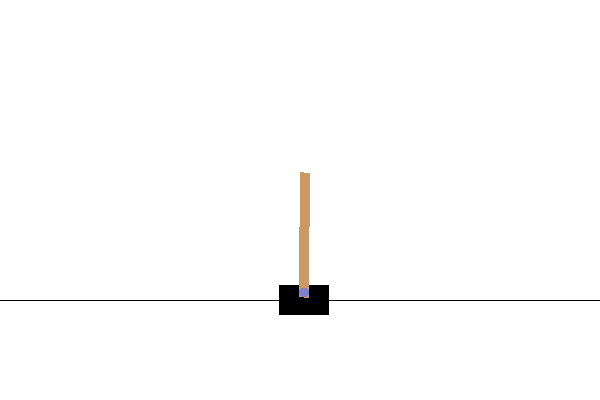

In [6]:
#@test {"skip": true}
env.reset()
PIL.Image.fromarray(env.render())

The `environment.step` method takes an `action` in the environment and returns a `TimeStep` tuple containing the next observation of the environment and the reward for the action.

The `time_step_spec()` method returns the specification for the `TimeStep` tuple. Its `observation` attribute shows the shape of observations, the data types, and the ranges of allowed values. The `reward` attribute shows the same details for the reward.


In [7]:
print('Observation Spec:')
print(env.time_step_spec().observation)

Observation Spec:
BoundedArraySpec(shape=(4,), dtype=dtype('float32'), name='observation', minimum=[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], maximum=[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38])


In [8]:
print('Reward Spec:')
print(env.time_step_spec().reward)

Reward Spec:
ArraySpec(shape=(), dtype=dtype('float32'), name='reward')


The `action_spec()` method returns the shape, data types, and allowed values of valid actions.

In [9]:
print('Action Spec:')
print(env.action_spec())

Action Spec:
BoundedArraySpec(shape=(), dtype=dtype('int64'), name='action', minimum=0, maximum=1)


In the Cartpole environment:

-   `observation` is an array of 4 floats: 
    -   the position and velocity of the cart
    -   the angular position and velocity of the pole 
-   `reward` is a scalar float value
-   `action` is a scalar integer with only two possible values:
    -   `0` — "move left"
    -   `1` — "move right"


In [10]:
time_step = env.reset()
print('Time step:')
print(time_step)

action = np.array(1, dtype=np.int32)

next_time_step = env.step(action)
print('Next time step:')
print(next_time_step)

Time step:
TimeStep(step_type=array(0, dtype=int32), reward=array(0., dtype=float32), discount=array(1., dtype=float32), observation=array([-0.01409908,  0.02984941, -0.00575762, -0.04710222], dtype=float32))
Next time step:
TimeStep(step_type=array(1, dtype=int32), reward=array(1., dtype=float32), discount=array(1., dtype=float32), observation=array([-0.01350209,  0.22505344, -0.00669967, -0.34159616], dtype=float32))


Usually two environments are instantiated: one for training and one for evaluation. 

In [11]:
train_py_env = suite_gym.load(env_name)
eval_py_env = suite_gym.load(env_name)

The Cartpole environment, like most environments, is written in pure Python. This is converted to TensorFlow using the `TFPyEnvironment` wrapper.

The original environment's API uses Numpy arrays. The `TFPyEnvironment` converts these to `Tensors` to make it compatible with Tensorflow agents and policies.


In [36]:
train_env = tf_py_environment.TFPyEnvironment(train_py_env)
eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)

## Agent

The algorithm used to solve an RL problem is represented by an `Agent`. TF-Agents provides standard implementations of a variety of `Agents`, including:

-   [DQN](https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf) (used in this tutorial)
-   [REINFORCE](https://www-anw.cs.umass.edu/~barto/courses/cs687/williams92simple.pdf)
-   [DDPG](https://arxiv.org/pdf/1509.02971.pdf)
-   [TD3](https://arxiv.org/pdf/1802.09477.pdf)
-   [PPO](https://arxiv.org/abs/1707.06347)
-   [SAC](https://arxiv.org/abs/1801.01290).

The DQN agent can be used in any environment which has a discrete action space.

At the heart of a DQN Agent is a `QNetwork`, a neural network model that can learn to predict `QValues` (expected returns) for all actions, given an observation from the environment.

Use `tf_agents.networks.q_network` to create a `QNetwork`, passing in the `observation_spec`, `action_spec`, and a tuple describing the number and size of the model's hidden layers.


In [13]:
fc_layer_params = (100,)

q_net = q_network.QNetwork(
    train_env.observation_spec(),
    train_env.action_spec(),
    fc_layer_params=fc_layer_params)

Now use `tf_agents.agents.dqn.dqn_agent` to instantiate a `DqnAgent`. In addition to the `time_step_spec`, `action_spec` and the QNetwork, the agent constructor also requires an optimizer (in this case, `AdamOptimizer`), a loss function, and an integer step counter.

In [14]:
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)

train_step_counter = tf.Variable(0)

agent = dqn_agent.DqnAgent(
    train_env.time_step_spec(),
    train_env.action_spec(),
    q_network=q_net,
    optimizer=optimizer,
    td_errors_loss_fn=common.element_wise_squared_loss,
    train_step_counter=train_step_counter)

agent.initialize()

## Policies

A policy defines the way an agent acts in an environment. Typically, the goal of reinforcement learning is to train the underlying model until the policy produces the desired outcome.

In this tutorial:

-   The desired outcome is keeping the pole balanced upright over the cart.
-   The policy returns an action (left or right) for each `time_step` observation.

Agents contain two policies: 

-   `agent.policy` — The main policy that is used for evaluation and deployment.
-   `agent.collect_policy` — A second policy that is used for data collection.


In [15]:
eval_policy = agent.policy
collect_policy = agent.collect_policy

Policies can be created independently of agents. For example, use `tf_agents.policies.random_tf_policy` to create a policy which will randomly select an action for each `time_step`.

In [16]:
random_policy = random_tf_policy.RandomTFPolicy(train_env.time_step_spec(),
                                                train_env.action_spec())

To get an action from a policy, call the `policy.action(time_step)` method. The `time_step` contains the observation from the environment. This method returns a `PolicyStep`, which is a named tuple with three components:

-   `action` — the action to be taken (in this case, `0` or `1`)
-   `state` — used for stateful (that is, RNN-based) policies
-   `info` — auxiliary data, such as log probabilities of actions

In [17]:
example_environment = tf_py_environment.TFPyEnvironment(
    suite_gym.load('CartPole-v0'))

In [18]:
time_step = example_environment.reset()

In [19]:
random_policy.action(time_step)

PolicyStep(action=<tf.Tensor: shape=(1,), dtype=int64, numpy=array([0])>, state=(), info=())

## Metrics and Evaluation

The most common metric used to evaluate a policy is the average return. The return is the sum of rewards obtained while running a policy in an environment for an episode. Several episodes are run, creating an average return.

The following function computes the average return of a policy, given the policy, environment, and a number of episodes.


In [20]:
#@test {"skip": true}
def compute_avg_return(environment, policy, num_episodes=10):

  total_return = 0.0
  for _ in range(num_episodes):

    time_step = environment.reset()
    episode_return = 0.0

    while not time_step.is_last():
      action_step = policy.action(time_step)
      time_step = environment.step(action_step.action)
      episode_return += time_step.reward
    total_return += episode_return

  avg_return = total_return / num_episodes
  return avg_return.numpy()[0]


# See also the metrics module for standard implementations of different metrics.
# https://github.com/tensorflow/agents/tree/master/tf_agents/metrics

Running this computation on the `random_policy` shows a baseline performance in the environment.

In [21]:
compute_avg_return(eval_env, random_policy, num_eval_episodes)

19.9

## Replay Buffer

The replay buffer keeps track of data collected from the environment. This tutorial uses `tf_agents.replay_buffers.tf_uniform_replay_buffer.TFUniformReplayBuffer`, as it is the most common. 

The constructor requires the specs for the data it will be collecting. This is available from the agent using the `collect_data_spec` method. The batch size and maximum buffer length are also required.


In [22]:
replay_buffer = tf_uniform_replay_buffer.TFUniformReplayBuffer(
    data_spec=agent.collect_data_spec,
    batch_size=train_env.batch_size,
    max_length=replay_buffer_max_length)

For most agents, `collect_data_spec` is a named tuple called `Trajectory`, containing the specs for observations, actions, rewards, and other items.

In [23]:
agent.collect_data_spec

Trajectory(step_type=TensorSpec(shape=(), dtype=tf.int32, name='step_type'), observation=BoundedTensorSpec(shape=(4,), dtype=tf.float32, name='observation', minimum=array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32), maximum=array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32)), action=BoundedTensorSpec(shape=(), dtype=tf.int64, name='action', minimum=array(0), maximum=array(1)), policy_info=(), next_step_type=TensorSpec(shape=(), dtype=tf.int32, name='step_type'), reward=TensorSpec(shape=(), dtype=tf.float32, name='reward'), discount=BoundedTensorSpec(shape=(), dtype=tf.float32, name='discount', minimum=array(0., dtype=float32), maximum=array(1., dtype=float32)))

In [25]:
agent.collect_data_spec._fields

('step_type',
 'observation',
 'action',
 'policy_info',
 'next_step_type',
 'reward',
 'discount')

## Data Collection

Now execute the random policy in the environment for a few steps, recording the data in the replay buffer.

In [26]:
#@test {"skip": true}
def collect_step(environment, policy, buffer):
  time_step = environment.current_time_step()
  action_step = policy.action(time_step)
  next_time_step = environment.step(action_step.action)
  traj = trajectory.from_transition(time_step, action_step, next_time_step)

  # Add trajectory to the replay buffer
  buffer.add_batch(traj)

def collect_data(env, policy, buffer, steps):
  for _ in range(steps):
    collect_step(env, policy, buffer)

collect_data(train_env, random_policy, replay_buffer, initial_collect_steps)

# This loop is so common in RL, that we provide standard implementations. 
# For more details see the drivers module.
# https://www.tensorflow.org/agents/api_docs/python/tf_agents/drivers

The replay buffer is now a collection of Trajectories.

In [28]:
# For the curious:
# Uncomment to peel one of these off and inspect it.
# iter(replay_buffer.as_dataset()).next()

The agent needs access to the replay buffer. This is provided by creating an iterable `tf.data.Dataset` pipeline which will feed data to the agent.

Each row of the replay buffer only stores a single observation step. But since the DQN Agent needs both the current and next observation to compute the loss, the dataset pipeline will sample two adjacent rows for each item in the batch (`num_steps=2`).

This dataset is also optimized by running parallel calls and prefetching data.

In [27]:
# Dataset generates trajectories with shape [Bx2x...]
dataset = replay_buffer.as_dataset(
    num_parallel_calls=3, 
    sample_batch_size=batch_size, 
    num_steps=2).prefetch(3)


dataset

Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


<PrefetchDataset shapes: (Trajectory(step_type=(64, 2), observation=(64, 2, 4), action=(64, 2), policy_info=(), next_step_type=(64, 2), reward=(64, 2), discount=(64, 2)), BufferInfo(ids=(64, 2), probabilities=(64,))), types: (Trajectory(step_type=tf.int32, observation=tf.float32, action=tf.int64, policy_info=(), next_step_type=tf.int32, reward=tf.float32, discount=tf.float32), BufferInfo(ids=tf.int64, probabilities=tf.float32))>

In [28]:
iterator = iter(dataset)

print(iterator)


In [31]:
# For the curious:
# Uncomment to see what the dataset iterator is feeding to the agent.
# Compare this representation of replay data 
# to the collection of individual trajectories shown earlier.

# iterator.next()

## Training the agent

Two things must happen during the training loop:

-   collect data from the environment
-   use that data to train the agent's neural network(s)

This example also periodicially evaluates the policy and prints the current score.

The following will take ~5 minutes to run.

In [30]:
#@test {"skip": true}
try:
  %%time
except:
  pass

# (Optional) Optimize by wrapping some of the code in a graph using TF function.
agent.train = common.function(agent.train)

# Reset the train step
agent.train_step_counter.assign(0)

# Evaluate the agent's policy once before training.
avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)
returns = [avg_return]

for _ in range(num_iterations):

  # Collect a few steps using collect_policy and save to the replay buffer.
  collect_data(train_env, agent.collect_policy, replay_buffer, collect_steps_per_iteration)

  # Sample a batch of data from the buffer and update the agent's network.
  experience, unused_info = next(iterator)
  train_loss = agent.train(experience).loss

  step = agent.train_step_counter.numpy()

  if step % log_interval == 0:
    print('step = {0}: loss = {1}'.format(step, train_loss))

  if step % eval_interval == 0:
    avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)
    print('step = {0}: Average Return = {1}'.format(step, avg_return))
    returns.append(avg_return)

step = 200: loss = 3744.8154296875
step = 400: loss = 303.14874267578125
step = 600: loss = 5126.49755859375
step = 800: loss = 11126.564453125
step = 1000: loss = 23022.57421875
step = 1000: Average Return = 197.39999389648438
step = 1200: loss = 223.35995483398438
step = 1400: loss = 195.03292846679688
step = 1600: loss = 346.8494567871094
step = 1800: loss = 13271.8046875
step = 2000: loss = 278.3450622558594
step = 2000: Average Return = 199.5
step = 2200: loss = 13456.671875
step = 2400: loss = 9969.74609375
step = 2600: loss = 425.535400390625
step = 2800: loss = 5602.6806640625
step = 3000: loss = 225.52566528320312
step = 3000: Average Return = 200.0
step = 3200: loss = 18630.533203125
step = 3400: loss = 281.9873046875
step = 3600: loss = 143.26632690429688
step = 3800: loss = 10691.51953125
step = 4000: loss = 343.5277099609375
step = 4000: Average Return = 199.8000030517578
step = 4200: loss = 131.9401397705078
step = 4400: loss = 269.4884948730469
step = 4600: loss = 512.39

## Visualization


### Plots

Use `matplotlib.pyplot` to chart how the policy improved during training.

One iteration of `Cartpole-v0` consists of 200 time steps. The environment gives a reward of `+1` for each step the pole stays up, so the maximum return for one episode is 200. The charts shows the return increasing towards that maximum each time it is evaluated during training. (It may be a little unstable and not increase monotonically each time.)

(187.7150032043457, 250.0)

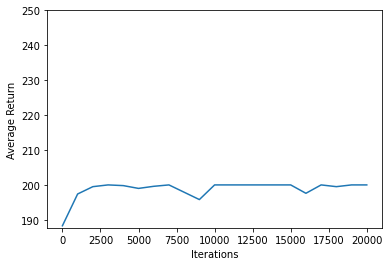

In [31]:
#@test {"skip": true}

iterations = range(0, num_iterations + 1, eval_interval)
plt.plot(iterations, returns)
plt.ylabel('Average Return')
plt.xlabel('Iterations')
plt.ylim(top=250)

### Videos

Charts are nice. But more exciting is seeing an agent actually performing a task in an environment. 

First, create a function to embed videos in the notebook.

In [32]:
def embed_mp4(filename):
  """Embeds an mp4 file in the notebook."""
  video = open(filename,'rb').read()
  b64 = base64.b64encode(video)
  tag = '''
  <video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
  Your browser does not support the video tag.
  </video>'''.format(b64.decode())

  return IPython.display.HTML(tag)

Now iterate through a few episodes of the Cartpole game with the agent. The underlying Python environment (the one "inside" the TensorFlow environment wrapper) provides a `render()` method, which outputs an image of the environment state. These can be collected into a video.

In [34]:
def create_policy_eval_video(policy, filename, num_episodes=5, fps=30):
  filename = filename + ".mp4"
  with imageio.get_writer(filename, fps=fps) as video:
    for _ in range(num_episodes):
      time_step = eval_env.reset()
      video.append_data(eval_py_env.render())
      while not time_step.is_last():
        action_step = policy.action(time_step)
        time_step = eval_env.step(action_step.action)
        video.append_data(eval_py_env.render())
  return embed_mp4(filename)




create_policy_eval_video(agent.policy, "trained-agent")

For fun, compare the trained agent (above) to an agent moving randomly. (It does not do as well.)

In [35]:
create_policy_eval_video(random_policy, "random-agent")